# Función de distribución acmululada (FDA)

La función de distribución acmuulada calcula la probabilidad acumulada de un valor dado de un conjunto de datos. 

Sirve para determinar la probabilidad de que una observación aleatoria que se toma de la población sea menor que o igual a cierto valor.

Es también una función muy útil para analizar la distribución de un conjunto de datos. En este sentido, se trata de una manera visual de analizar percentiles.

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
plt.style.use('ggplot')

Vamos a analizar cómo se distribuye las calificaciones de un conjunto de estudiantes en varios tests. Utilizamos la base de datos disponible en [kaggle](https://www.kaggle.com/datasets/spscientist/students-performance-in-exams/)

In [79]:
score = pd.read_csv('StudentsPerformance.csv')

In [80]:
score

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [75]:
def ecdf(data):
    """La función crea una ECDF para un conjunto de datos."""
    # Number of data points: n
    n = len(data)

    # x-data ECDF: x
    x = np.sort(data)

    # y-data ECDF: y
    y = np.arange(1, n+1) / n

    return x, y


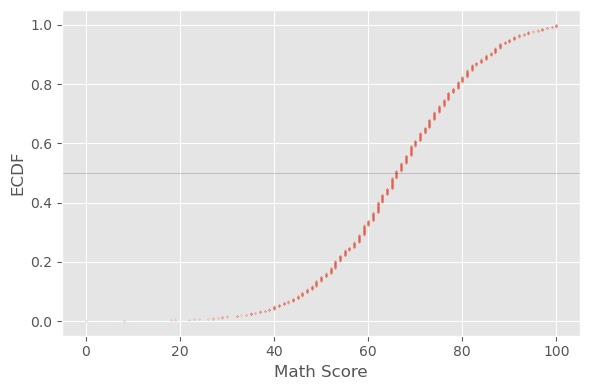

In [81]:
# Calcular ECDF para el test de matemáticas
x_math, y_math = ecdf(score['math score'])

# Plot
plt.figure(figsize=(6,4))
plt.plot(x_math, y_math, marker='.', markersize=0.3, linestyle='none')

# Añadir línea de mediana
plt.axhline(y=0.5, linewidth=0.4, alpha=0.3, color ='black')

# Etiquetas
plt.xlabel('Math Score')
plt.ylabel('ECDF')

# Mostrar gráfico
plt.show()

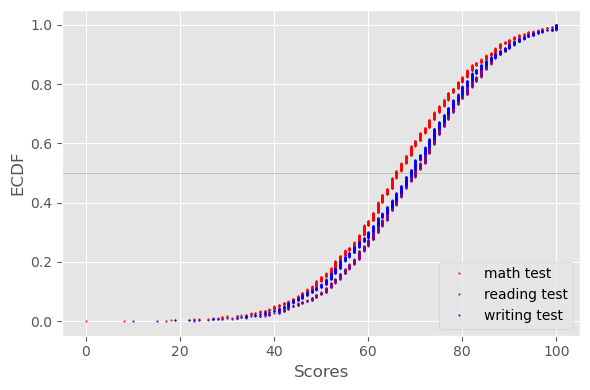

In [82]:
# Calcular ECDF para los tres tests
x_math, y_math = ecdf(score['math score'])
x_reading, y_reading = ecdf(score['reading score'])
x_writing, y_writing = ecdf(score['writing score'])

# Plot
plt.figure(figsize=(6,4))
plt.plot(x_math, y_math, marker='.', markersize=1, linestyle='none',c='red')
plt.plot(x_reading, y_reading, marker='.', markersize=1, linestyle='none',c='purple')
plt.plot(x_writing, y_writing, marker='.', markersize=1, linestyle='none',c='blue')

# Añadir línea de mediana
plt.axhline(y=0.5, linewidth=0.4, alpha=0.3, color ='black')

# Etiquetas
plt.legend(('math test', 'reading test', 'writing test'), loc='lower right')
plt.xlabel('Scores')
plt.ylabel('ECDF')

# Mostrar gráfico
plt.show()

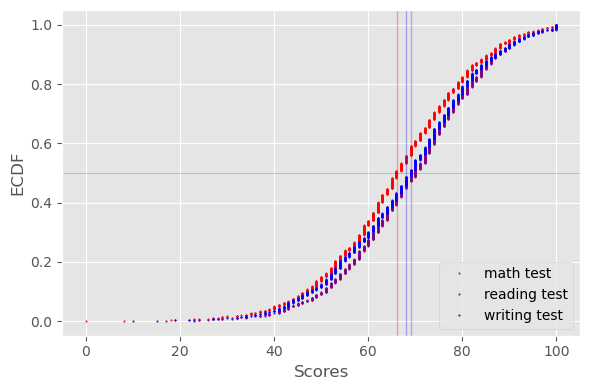

In [83]:
# Calcular ECDF para el test de matemáticas
x_math, y_math = ecdf(score['math score'])
x_reading, y_reading = ecdf(score['reading score'])
x_writing, y_writing = ecdf(score['writing score'])

# Plot
plt.figure(figsize=(6,4))
plt.plot(x_math, y_math, marker='.', markersize=1, linestyle='none',c='red')
plt.plot(x_reading, y_reading, marker='.', markersize=1, linestyle='none',c='purple')
plt.plot(x_writing, y_writing, marker='.', markersize=1, linestyle='none',c='blue')

# Añadir línea de mediana
plt.axhline(y=0.5, linewidth=0.4, alpha=0.3, color ='black')

# Añadir medias
plt.axvline(x=score['math score'].mean(), linewidth=1, alpha=0.3, color ='red')
plt.axvline(x=score['reading score'].mean(), linewidth=1, alpha=0.3, color ='purple')
plt.axvline(x=score['writing score'].mean(), linewidth=1, alpha=0.3, color ='blue')

# Etiquetas
plt.legend(('math test', 'reading test', 'writing test'), loc='lower right')
plt.xlabel('Scores')
plt.ylabel('ECDF')

# Mostrar gráfico
plt.show()

In [84]:
# medias de cada test
print('math score:',score['math score'].mean())
print('readng score:',score['reading score'].mean())
print('writing score:',score['writing score'].mean())

math score: 66.089
readng score: 69.169
writing score: 68.054


Por último, podemos crear la gráfica de forma más rápida utilizando la función `ecdfplot()` seaborn, que puedes ver [aquí](https://seaborn.pydata.org/generated/seaborn.ecdfplot.html)

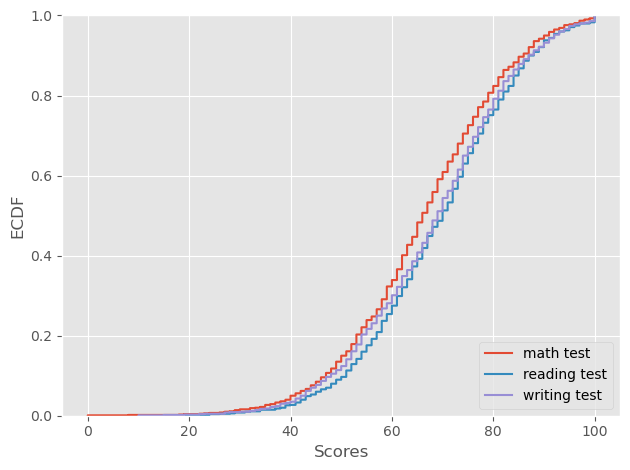

In [85]:
# Version seaborn
sns.ecdfplot(data=score, x="math score")
sns.ecdfplot(data=score, x="reading score")
sns.ecdfplot(data=score, x="writing score")

# Etiquetas

plt.legend(('math test', 'reading test', 'writing test'), loc='lower right')
plt.xlabel('Scores')
plt.ylabel('ECDF')

# Mostrar gráfico
plt.show()
